Training Simple RNN...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM...


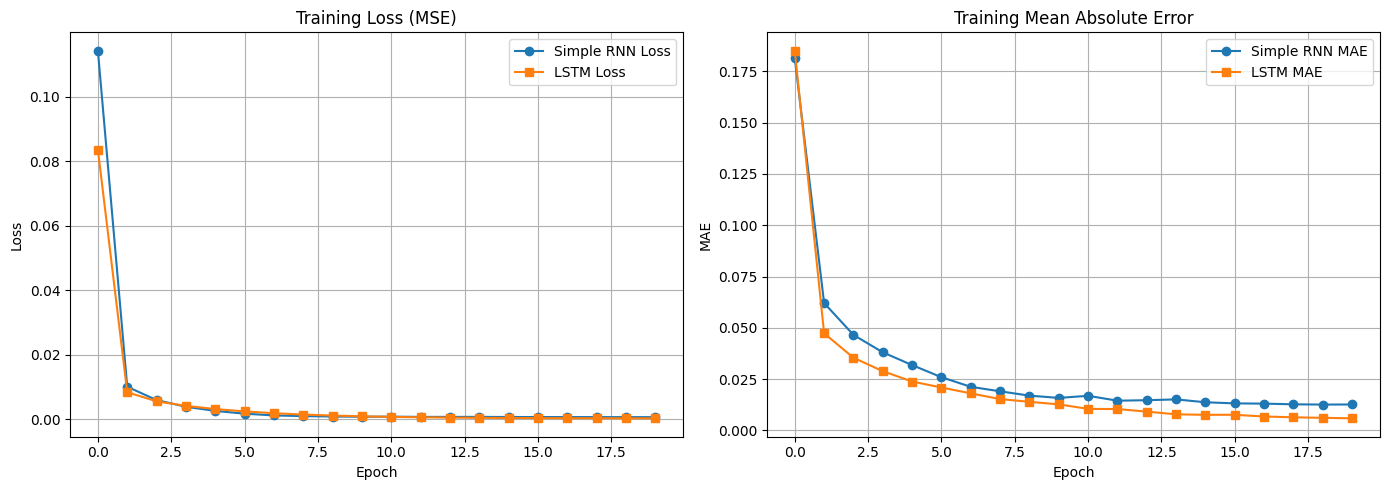

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# 1. Generate synthetic sequence data (sine wave prediction)
def generate_data(seq_length=50, num_samples=1000):
    X = []
    y = []
    for _ in range(num_samples):
        start = np.random.rand() * 2 * np.pi
        seq = np.array([np.sin(start + i * 0.1) for i in range(seq_length)])
        X.append(seq[:-1])
        y.append(seq[1:])
    X = np.array(X)
    y = np.array(y)
    return X[..., np.newaxis], y[..., np.newaxis]

X, y = generate_data()

# 2. Build RNN and LSTM models
def build_rnn():
    model = Sequential([
        SimpleRNN(20, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
        Dense(1)
    ])
    model.compile(optimizer=Adam(0.01), loss='mse', metrics=['mae'])
    return model

def build_lstm():
    model = Sequential([
        LSTM(20, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
        Dense(1)
    ])
    model.compile(optimizer=Adam(0.01), loss='mse', metrics=['mae'])
    return model

# 3. Train both models
print("Training Simple RNN...")
rnn_model = build_rnn()
history_rnn = rnn_model.fit(X, y, epochs=20, batch_size=32, verbose=0)

print("Training LSTM...")
lstm_model = build_lstm()
history_lstm = lstm_model.fit(X, y, epochs=20, batch_size=32, verbose=0)

# 4. Plot training loss and MAE
plt.figure(figsize=(14, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['loss'], label='Simple RNN Loss', marker='o')
plt.plot(history_lstm.history['loss'], label='LSTM Loss', marker='s')
plt.title('Training Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# MAE
plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['mae'], label='Simple RNN MAE', marker='o')
plt.plot(history_lstm.history['mae'], label='LSTM MAE', marker='s')
plt.title('Training Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
